<a href="https://colab.research.google.com/github/withjungjh/My-Neuromatch-Academy/blob/Mathematics-and-Python/3%EC%A0%95%EC%A7%84%ED%99%98_LinearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title FIgure setting
import ipywidgets as widgets
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [ ]:
#@title Plotting functions
def visualize_vectors(v, v_unit):
  """ Plots a 2D vector and the corresponding unit vector

  Args:
    v (ndarray): array of size (2,) with the vector coordinates
    v_unit (ndarray): array of size (2, ) with the unit vector coordinates

  """
  fig, ax = plt.subplots()

  # Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.set(xlim = [-6, 6], ylim = [-6, 6])
  ax.grid(True, alpha=.4, linewidth=1, zorder=0)

  # Plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], width=0.08, color='#648FFF', length_includes_head = True, zorder = 2);
  v_unit_arr = ax.arrow(0, 0, v_unit[0], v_unit[1], width=0.08, color='#DC267F', length_includes_head = True, zorder = 3);
  ax.set(xlim = [-4, 4], ylim = [-4, 4]);

  # Add legend
  leg = ax.legend([v_arr, v_unit_arr], [r"Vector $\mathbf{v}$", r"Normalized vector $\tilde{\mathbf{v}}$"], handlelength = 0, fontsize = 20, loc = 'upper left')
  for handle, label in zip(leg.legendHandles, leg.texts):
    label.set_color(handle.get_facecolor())
    handle.set_visible(False)

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

vector
- ordered list of numbers (computational science view)
- an arrow (phsics view)
- can be used to mark activity of neurons

properties
- dimentionality
  - n component -> n dimensional
- length
$$ 
||\textbf{x}|| = \sqrt{\sum^{N}_{i = 1}x^2_i}
$$
- special vector
  - zero vector: all component = 0
  - unit vector

  ## Exercise 1.1: Normalizing vectors


In [ ]:
def normalize_vector(input_vector):
  '''
  Normalizes a vector to length one

  Args:
    input_vector (ndarray): array of shape (n_dim, ) where n_dim is 
    the dimensionality of the vector

  Return:
    (ndarray): normalized vector of length 1

  '''
  vector_length = np.linalg.norm(input_vector)

  normalized_vector = 1/vector_length * input_vector

  return normalized_vector


  

In [ ]:
v = np.array([4,1])
print(v)

[4 1]


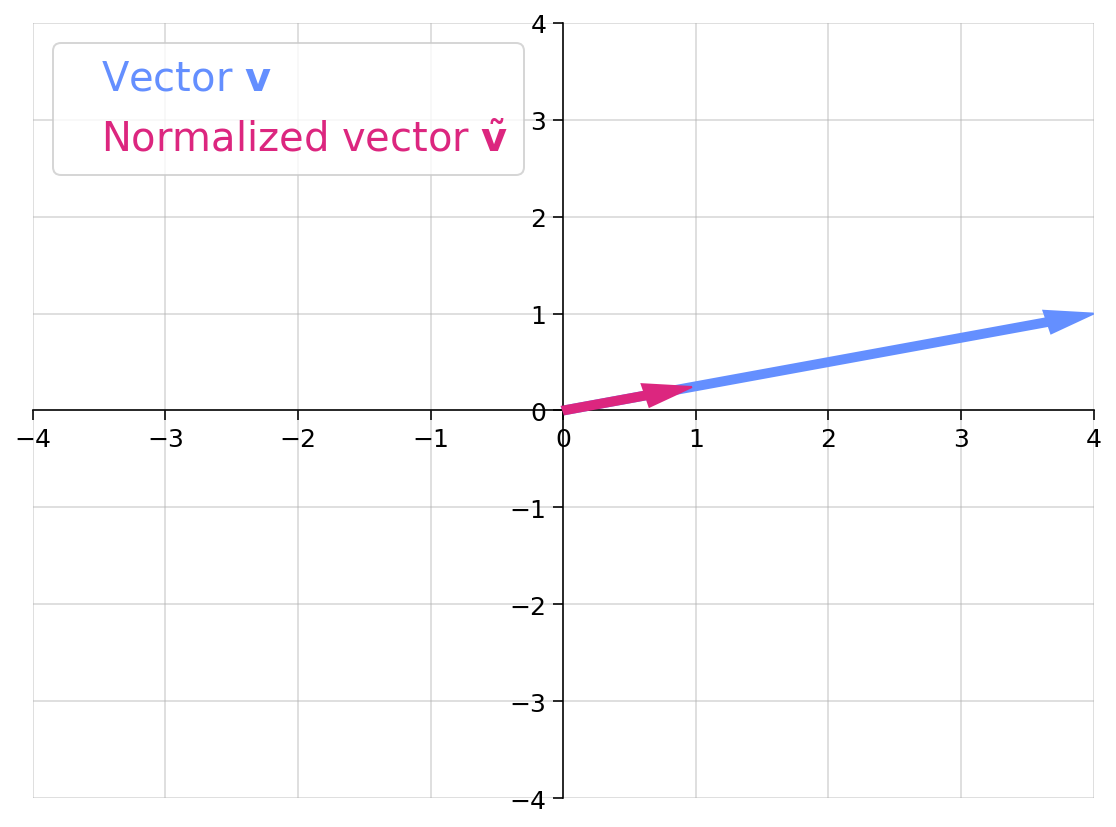

In [ ]:
v_unit = normalize_vector(v)
visualize_vectors(v, v_unit)

# Vector Operation
- scalar multiplication
- vector addition
- linear combination : scalar multiplication and vector addition


In [ ]:
 #@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.


def plot_arrows(x, y, a_times_x, b_times_y):
  fig, ax = plt.subplots(figsize=(10, 7))

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  ax.set_aspect('equal', adjustable='box')
  ax.set(xlim = [-10, 10], ylim = [-10, 10], xticks = np.arange(-10, 10), yticks = np.arange(-10, 10), xticklabels = [], yticklabels = [])

  ax.grid(alpha=.4)

  z = a_times_x + b_times_y
  z_arr = ax.arrow(0, 0, z[0], z[1], width=.08, color='k', length_includes_head = True);

  x_orig, = ax.plot([0, x[0]], [0, x[1]], '--', color='#648FFF')
  y_orig, = ax.plot([0, y[0]], [0, y[1]], '--',  color='#DC267F')

  ax_arr = ax.arrow(0, 0, a_times_x[0], a_times_x[1], width=.08, color='#648FFF', length_includes_head = True);
  by_arr = ax.arrow(0, 0, b_times_y[0], b_times_y[1], width=.08, color='#DC267F', length_includes_head = True);

  ax.plot([a_times_x[0], z[0]], [a_times_x[1], z[1]], '--k')
  ax.plot([b_times_y[0], z[0]], [b_times_y[1], z[1]], '--k')


  leg = ax.legend([x_orig, y_orig, ax_arr, by_arr, z_arr], [r"$\mathbf{x}$", r"$\mathbf{y}$", r"$a\mathbf{x}$", r"$b\mathbf{y}$", r"$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$"], handlelength = 2, fontsize = 25, loc = 'center left', bbox_to_anchor=(1.05, .5))
  for handle, label in zip(leg.legendHandles, leg.texts):
      try:
          label.set_color(handle.get_facecolor())
      except:
          label.set_color(handle.get_color())
      #handle.set_visible(False)

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([-1, 2])

  plot_arrows(x, y, a*x, b*y)

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

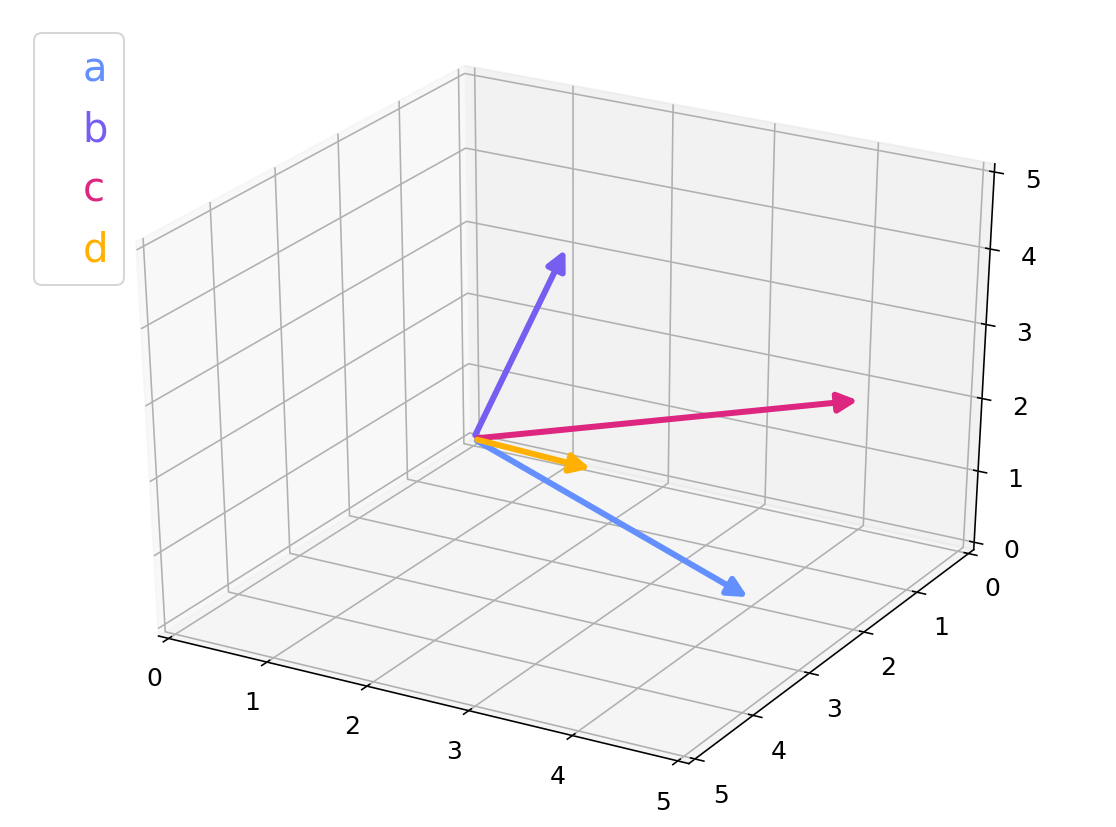

In [ ]:
# @markdown Execute this cell to visualize vectors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = Arrow3D([0, 4], [0, 2],
                [0, 0], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#648FFF")

ax.add_artist(a)
b = Arrow3D([0, 1], [0, 0],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#785EF0")

ax.add_artist(b)
c = Arrow3D([0, 5], [0, 2],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#DC267F")

ax.add_artist(c)
d = Arrow3D([0, 3], [0, 3],
                [0, 2], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#FFB000")

ax.add_artist(d)

leg = ax.legend([a, b, c, d], ['a', 'b', 'c', 'd'], handlelength = 0, fontsize = 20, loc = 'upper left')
for handle, label in zip(leg.legendHandles, leg.texts):
  label.set_color(handle.get_facecolor())
  handle.set_visible(False)
ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5]); #, xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');

Span of set of vectors = set of all linear combinations of those vectors

linearly dependent = can be written as linear combination of others

# Think! 2.1: Determining dependence

1. linearly dependent. Because a + b = c, c is linear comblination of a and b. 
2. R^3
3. A plane that has normal vector as a x b
4. A line whose direction vetor is parallel to a
5. the same answer with 3.

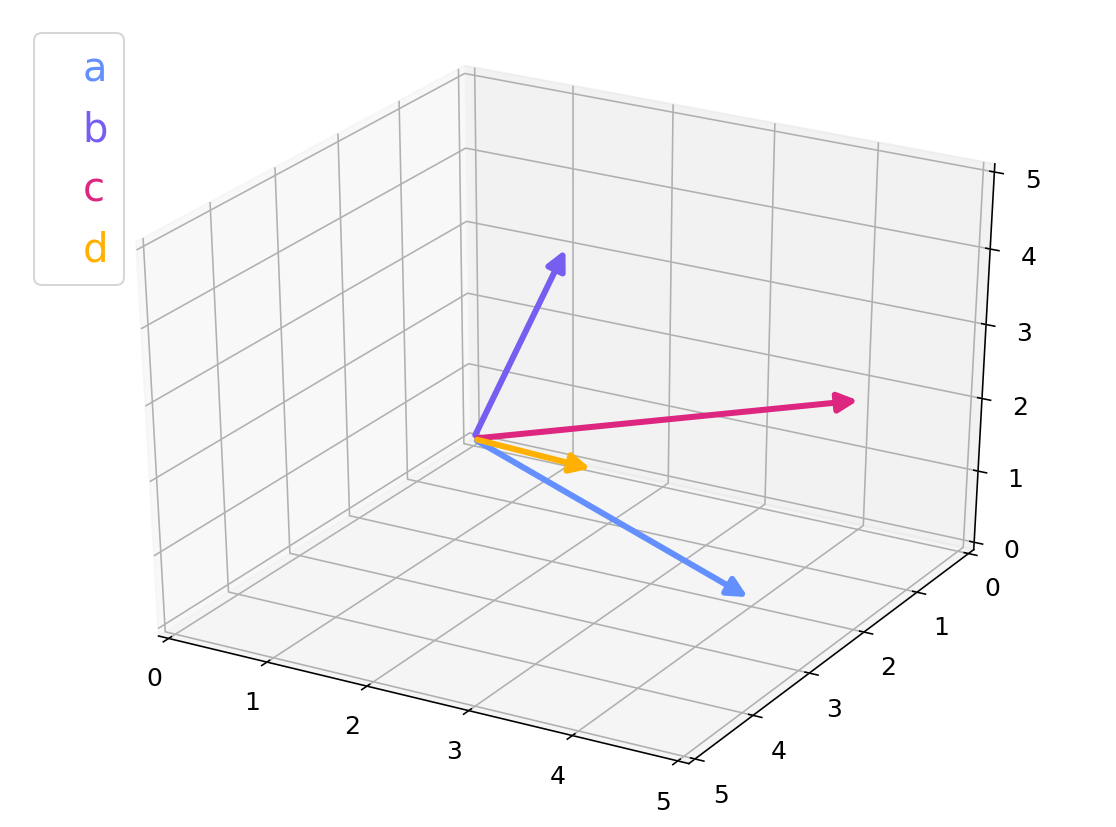

In [ ]:
# @markdown Execute this cell to visualize vectors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = Arrow3D([0, 4], [0, 2],
                [0, 0], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#648FFF")

ax.add_artist(a)
b = Arrow3D([0, 1], [0, 0],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#785EF0")

ax.add_artist(b)
c = Arrow3D([0, 5], [0, 2],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#DC267F")

ax.add_artist(c)
d = Arrow3D([0, 3], [0, 3],
                [0, 2], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#FFB000")

ax.add_artist(d)

leg = ax.legend([a, b, c, d], ['a', 'b', 'c', 'd'], handlelength = 0, fontsize = 20, loc = 'upper left')
for handle, label in zip(leg.legendHandles, leg.texts):
  label.set_color(handle.get_facecolor())
  handle.set_visible(False)
ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5]); #, xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');

- basis: 
- standard basis:
- changing basis: 
- number of basis vector = dimentionality of the space:
- vector spaces: set of vectors closed under linear combination

# Think! 2.2: Figuring out a basis
1. 2 basis is requried for 2D space and the number of componenents of those vectors is 3. 
2. 3(x) -> 2...?

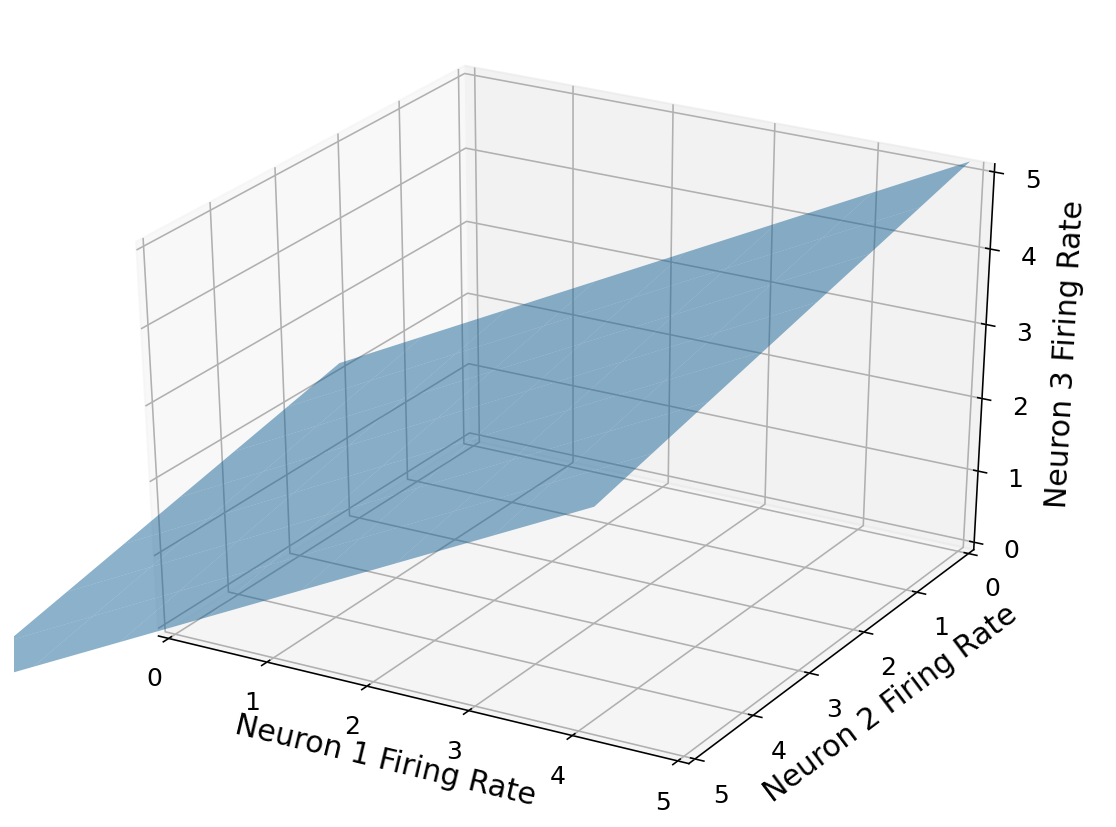

In [ ]:
# @markdown Execute this cell to see figure

fig = plt.figure()

# add axes
ax = fig.add_subplot(111,projection='3d')

xx, yy = np.meshgrid(range(-4, 4), range(-4, 4))
z = .7*xx + -.2*yy

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)

ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5], xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');
#ax.invert_xaxis()

# Neural connection and dot product
Neuron1, Neuron 2, and Neuron 3 activate with activities respectively r1, r2, and r3.
For each neuron connect to a LGN neuron with g activity and the connection strength of three neuron is w1, w2, w3.

$$ g = w_1r_1 + w_2r_2 + w_3r_3 $$
$$ \textbf{x}\cdot\textbf{y} = \sum^{n}_{i = 1}x_iy_j  $$





In [ ]:
x = np.array([2,3])
y = np.array([1,4])
dot_prod = np.dot(x,y)

In [ ]:
print(dot_prod)

14


# Interactive Demo 3.1: LGN firing


In [ ]:
#@markdown Make sure you execute this cell to enable the widget!

step = .1
x_vec = np.arange(-4, 4.001, step)
y_vec = np.arange(-4, 4.001, step)
n_pixels = x_vec.shape[0]


heatmap = np.zeros((n_pixels, n_pixels))
y = np.array([1, 3])
for i, coord1 in enumerate(x_vec):
  for j, coord2 in enumerate(x_vec):
    heatmap[i, j] = np.dot(np.array([coord1, coord2]), y)
circle_mask = np.zeros((n_pixels, n_pixels))

for i, coord_i in enumerate(x_vec):
  for j, coord_j in enumerate(y_vec):
    circle_mask[i, j] = np.sqrt(coord_i**2 + coord_j**2)

circle_mask = circle_mask < 4

heatmap = heatmap * circle_mask
mask = np.zeros((n_pixels, n_pixels))

def plot_heatmap(x, y, mask):

  fig, ax = plt.subplots()

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  heatmap[np.where(x_vec == x[0])[0], np.where(x_vec == x[1])[0]] = np.dot(x, y)

  masked_x = np.abs(x_vec - x[0]) < 1
  masked_y = np.abs(y_vec - x[1]) < 1
  mask += np.outer(masked_x, masked_y)
  mask = np.minimum(mask, 1)

  im = ax.imshow((heatmap * mask).T, vmin = -15, vmax = 15, origin = 'lower', alpha = .5, extent=[-n_pixels/2., n_pixels/2., -n_pixels/2., n_pixels/2. ], cmap = 'bwr')
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label('Response of LGN neuron (g)', rotation=270, labelpad=20)
  ax.set(xticklabels = [], yticklabels = [], xlabel = '$\mathbf{r}_1$')
  ax.set_ylabel('$\mathbf{r}_2$', rotation=0)

  ax.xaxis.set_label_coords(0, .45)
  ax.yaxis.set_label_coords(.5, 1)
  fr_arr = ax.arrow(0, 0, (1/step)*x[0], (1/step)*x[1], width=.5, color='#40B0A6', length_includes_head = True);
  we_arr = ax.arrow(0, 0, (1/step)*y[0], (1/step)*y[1], width=.5, color='k', length_includes_head = True);


  leg = ax.legend([fr_arr, we_arr], ['Retina firing rate vector', 'Weight vector'],
                  handlelength = 0, frameon=False, fontsize = 17,loc = 'center',
                  bbox_to_anchor=(.5, -.1))
  for handle, label in zip(leg.legendHandles, leg.texts):
        label.set_color(handle.get_facecolor())
        handle.set_visible(False)

  return mask

style = {'description_width': 'initial'}

@widgets.interact(neuron1_firing = widgets.FloatSlider(value=1.0, min=-4, max=4, step=1, style=style), neuron2_firing = widgets.FloatSlider(value=1.0, min=-4, max=4, step=1, style=style), mask = fixed(mask),  heatmap = fixed(heatmap))
def plot_linear_combination(neuron1_firing, neuron2_firing, mask):
  firing_rates = np.array([neuron1_firing, neuron2_firing])
  weights = np.array([1, 2])
  mask = plot_heatmap(firing_rates, weights, mask)

interactive(children=(FloatSlider(value=1.0, description='neuron1_firing', max=4.0, min=-4.0, step=1.0, style=…

Answers
1. [1, 2]^T which is the same direction with the weight vector
2. opposite direction to the weight vector -[1,2]^T
3. the dot product = 0 which is orthogonal to the weight vector
4. the activity variation is fully dependent on the direction of weight vector, because 
$$\textbf{r} \cdot \textbf{w} = \|\textbf{r}\|\|\textbf{w}\| \cos \theta$$

5. $\begin{bmatrix}1/\sqrt{5} \\ 2/\sqrt{5}\end{bmatrix}$

# Tutorial2: Matrix
For the activity of LGN neuron population
- matrix-vector multiplication
For the weight
- matrix inverse

In [ ]:
# @title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

In [ ]:
# @title Plotting functions
import numpy
from numpy.linalg import inv, eig
from math import ceil
from matplotlib import pyplot, ticker, get_backend, rc
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle

_int_backends = ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg',
                 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo',
                 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo']
_backend = get_backend()   # get current backend name

# shrink figsize and fontsize when using %matplotlib notebook
if _backend in _int_backends:
  fontsize = 4
  fig_scale = 0.75
else:
  fontsize = 5
  fig_scale = 1

grey = '#808080'
gold = '#cab18c'        # x-axis grid
lightblue = '#0096d6'   # y-axis grid
green = '#008367'       # x-axis basis vector
red = '#E31937'         # y-axis basis vector
darkblue = '#004065'

pink, yellow, orange, purple, brown = '#ef7b9d', '#fbd349', '#ffa500', '#a35cff', '#731d1d'

quiver_params = {'angles': 'xy',
                 'scale_units': 'xy',
                 'scale': 1,
                 'width': 0.012}

grid_params = {'linewidth': 0.5,
               'alpha': 0.8}

def set_rc(func):
  def wrapper(*args, **kwargs):
    rc('font', family='serif', size=fontsize)
    rc('figure', dpi=200)
    rc('axes', axisbelow=True, titlesize=5)
    rc('lines', linewidth=1)
    func(*args, **kwargs)
  return wrapper

@set_rc
def plot_vector(vectors, tails=None):
  ''' Draw 2d vectors based on the values of the vectors and the position of their tails.

  Parameters
  ----------
  vectors : list.
    List of 2-element array-like structures, each represents a 2d vector.

  tails : list, optional.
    List of 2-element array-like structures, each represents the coordinates of the tail
    of the corresponding vector in vectors. If None (default), all tails are set at the
    origin (0,0). If len(tails) is 1, all tails are set at the same position. Otherwise,
    vectors and tails must have the same length.

  Examples
  --------
  >>> v = [(1, 3), (3, 3), (4, 6)]
  >>> plot_vector(v)      # draw 3 vectors with their tails at origin
  >>> t = [numpy.array((2, 2))]
  >>> plot_vector(v, t)   # draw 3 vectors with their tails at (2,2)
  >>> t = [[3, 2], [-1, -2], [3, 5]]
  >>> plot_vector(v, t)   # draw 3 vectors with 3 different tails

  '''
  vectors = numpy.array(vectors)
  assert vectors.shape[1] == 2, "Each vector should have 2 elements."
  if tails is not None:
    tails = numpy.array(tails)
    assert tails.shape[1] == 2, "Each tail should have 2 elements."
  else:
    tails = numpy.zeros_like(vectors)

  # tile vectors or tails array if needed
  nvectors = vectors.shape[0]
  ntails = tails.shape[0]
  if nvectors == 1 and ntails > 1:
    vectors = numpy.tile(vectors, (ntails, 1))
  elif ntails == 1 and nvectors > 1:
    tails = numpy.tile(tails, (nvectors, 1))
  else:
    assert tails.shape == vectors.shape, "vectors and tail must have a same shape"

  # calculate xlimit & ylimit
  heads = tails + vectors
  limit = numpy.max(numpy.abs(numpy.hstack((tails, heads))))
  limit = numpy.ceil(limit * 1.2)   # add some margins

  figsize = numpy.array([2,2]) * fig_scale
  figure, axis = pyplot.subplots(figsize=figsize)
  axis.quiver(tails[:,0], tails[:,1], vectors[:,0], vectors[:,1], color=darkblue,
                  angles='xy', scale_units='xy', scale=1)
  axis.set_xlim([-limit, limit])
  axis.set_ylim([-limit, limit])
  axis.set_aspect('equal')

  # if xticks and yticks of grid do not match, choose the finer one
  xticks = axis.get_xticks()
  yticks = axis.get_yticks()
  dx = xticks[1] - xticks[0]
  dy = yticks[1] - yticks[0]
  base = max(int(min(dx, dy)), 1)   # grid interval is always an integer
  loc = ticker.MultipleLocator(base=base)
  axis.xaxis.set_major_locator(loc)
  axis.yaxis.set_major_locator(loc)
  axis.grid(True, **grid_params)

  # show x-y axis in the center, hide frames
  axis.spines['left'].set_position('center')
  axis.spines['bottom'].set_position('center')
  axis.spines['right'].set_color('none')
  axis.spines['top'].set_color('none')

@set_rc
def plot_transformation_helper(axis, matrix, *vectors, unit_vector=True, unit_circle=False, title=None):
  """ A helper function to plot the linear transformation defined by a 2x2 matrix.

  Parameters
  ----------
  axis : class matplotlib.axes.Axes.
    The axes to plot on.

  matrix : class numpy.ndarray.
    The 2x2 matrix to visualize.

  *vectors : class numpy.ndarray.
    The vector(s) to plot along with the linear transformation. Each array denotes a vector's
    coordinates before the transformation and must have a shape of (2,). Accept any number of vectors.

  unit_vector : bool, optional.
    Whether to plot unit vectors of the standard basis, default to True.

  unit_circle: bool, optional.
    Whether to plot unit circle, default to False.

  title: str, optional.
    Title of the plot.

  """
  assert matrix.shape == (2,2), "the input matrix must have a shape of (2,2)"
  grid_range = 20
  x = numpy.arange(-grid_range, grid_range+1)
  X_, Y_ = numpy.meshgrid(x,x)
  I = matrix[:,0]
  J = matrix[:,1]
  X = I[0]*X_ + J[0]*Y_
  Y = I[1]*X_ + J[1]*Y_
  origin = numpy.zeros(1)

  # draw grid lines
  for i in range(x.size):
    axis.plot(X[i,:], Y[i,:], c=gold, **grid_params)
    axis.plot(X[:,i], Y[:,i], c=lightblue, **grid_params)

  # draw (transformed) unit vectors
  if unit_vector:
    axis.quiver(origin, origin, [I[0]], [I[1]], color=green, **quiver_params)
    axis.quiver(origin, origin, [J[0]], [J[1]], color=red, **quiver_params)

  # draw optional vectors
  color_cycle = cycle([pink, darkblue, orange, purple, brown])
  if vectors:
    for vector in vectors:
      color = next(color_cycle)
      vector_ = matrix @ vector.reshape(-1,1)
      axis.quiver(origin, origin, [vector_[0]], [vector_[1]], color=color, **quiver_params)

  # draw optional unit circle
  if unit_circle:
    alpha =  numpy.linspace(0, 2*numpy.pi, 41)
    circle = numpy.vstack((numpy.cos(alpha), numpy.sin(alpha)))
    circle_trans = matrix @ circle
    axis.plot(circle_trans[0], circle_trans[1], color=red, lw=0.8)

  # hide frames, set xlimit & ylimit, set title
  limit = 4
  axis.spines['left'].set_position('center')
  axis.spines['bottom'].set_position('center')
  axis.spines['left'].set_linewidth(0.3)
  axis.spines['bottom'].set_linewidth(0.3)
  axis.spines['right'].set_color('none')
  axis.spines['top'].set_color('none')
  axis.set_xlim([-limit, limit])
  axis.set_ylim([-limit, limit])
  if title is not None:
    axis.set_title(title)

@set_rc
def plot_linear_transformation(matrix, *vectors, name = None, unit_vector=True, unit_circle=False):
  """ Plot the linear transformation defined by a 2x2 matrix using the helper
  function plot_transformation_helper(). It will create 2 subplots to visualize some
  vectors before and after the transformation.

  Parameters
  ----------
  matrix : class numpy.ndarray.
    The 2x2 matrix to visualize.

  *vectors : class numpy.ndarray.
    The vector(s) to plot along with the linear transformation. Each array denotes a vector's
    coordinates before the transformation and must have a shape of (2,). Accept any number of vectors.

  unit_vector : bool, optional.
    Whether to plot unit vectors of the standard basis, default to True.

  unit_circle: bool, optional.
    Whether to plot unit circle, default to False.

  """
  figsize = numpy.array([4,2]) * fig_scale
  figure, (axis1, axis2) = pyplot.subplots(1, 2, figsize=figsize)
  plot_transformation_helper(axis1, numpy.identity(2), *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='Before transformation')
  plot_transformation_helper(axis2, matrix, *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='After transformation')
  if name is not None:
    figure.suptitle(f'Population {name}')


def plot_eig_vec_transform(W):
  classic = 'k'
  vec_names = ['a', 'b','c','d','e','f','g', 'h']

  _, vecs = np.linalg.eig(W)
  vecs = vecs.T

  fig, axes = plt.subplots(1, 2, figsize=(2, 1))
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

  for i in range(2):
    axes[i].set(xlim=[-3.5, 3.5], ylim=[-3.5,3.5])
    axes[i].axis('Off')
    axes[i].plot([0, 0], [-3.5, 3.5], classic, alpha=.4)
    axes[i].plot([-3.5, 3.5], [0, 0], classic, alpha=.4)

  for i_vec, vec in enumerate(vecs):
    axes[0].arrow(0, 0, vec[0], vec[1], head_width=.2, facecolor=colors[i_vec], edgecolor=colors[i_vec], length_includes_head=True)
    axes[0].annotate(vec_names[i_vec], xy=(vec[0]+np.sign(vec[0])*.15, vec[1]+np.sign(vec[1])*.15), color=colors[i_vec])

    transformed_vec = np.matmul(W, vec)
    axes[1].arrow(0, 0, transformed_vec[0], transformed_vec[1], head_width=.2, facecolor=colors[i_vec], edgecolor=colors[i_vec], length_includes_head=True)
    axes[1].annotate(vec_names[i_vec], xy=(transformed_vec[0]+np.sign(transformed_vec[0])*.15, transformed_vec[1]+np.sign(transformed_vec[1])*.15), color=colors[i_vec])

  axes[0].set_title('Before')
  axes[1].set_title('After')

In [ ]:
P = np.array([[1, 3], [2, 1]]) # 맨 바깥쪽이 column vector 그 안쪽이 row vector
g_p = np.array([16, 7]) #column vector 취급을 하는 건가?
r = np.linalg.inv(P) @ g_p
print(r)

[1. 5.]


In [ ]:
# g_q = np.array([16, 7])
# Q = np.array([[4, 1], [8, 2]]) # singular matrix <=> determinant = 0

# print(np.linalg.inv(Q) @ g_q)

## Lienar transformation with matrix
- matrices transform vector
- matrices transform the whole space in a linear manner
  - origin remains where it is
  - Grid lines are straight
  - Grid lines remain parallel & evenly spaced

- matrix columns  = transformed basis vectors

### Exercise 1.2: Creating matrices for transformations


In [ ]:
A = np.array([[-1, 0],[0, 1]])

In [ ]:
A = np.array([[1,0], [0, 0]])

## Section1.3: Rank & Null Space
- square matrices can change dimesionality
- non square matrices can change dimensionality

- invertible matrix
one to one mapping should be possible, the matrix is invertible

- range of matrix : all possilbe place transformation can get to
- rank : dimentionality of range

- null space: matrix comes from to get to zero

- null space dimensionality >0 : loss of dimensions in transfomation
= 찌그러져서 다시 원상태로 돌리기에는 정보가 손실되는 것

- When are matrices invertible
  - when dimensionality doesn't change
  - when matrix is square and full rank
  - null space dimensionality is 0








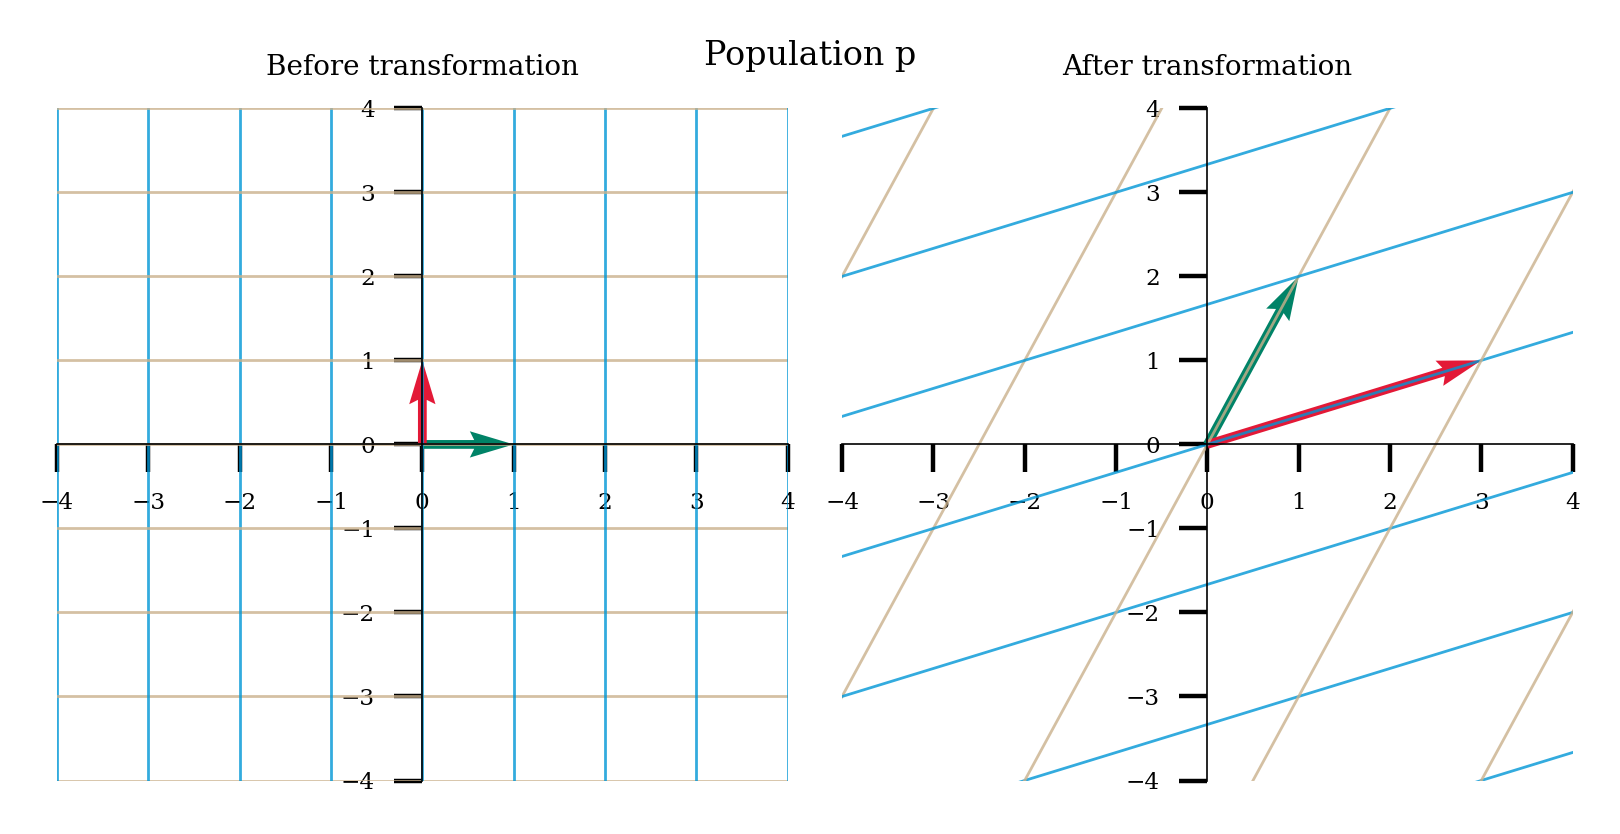

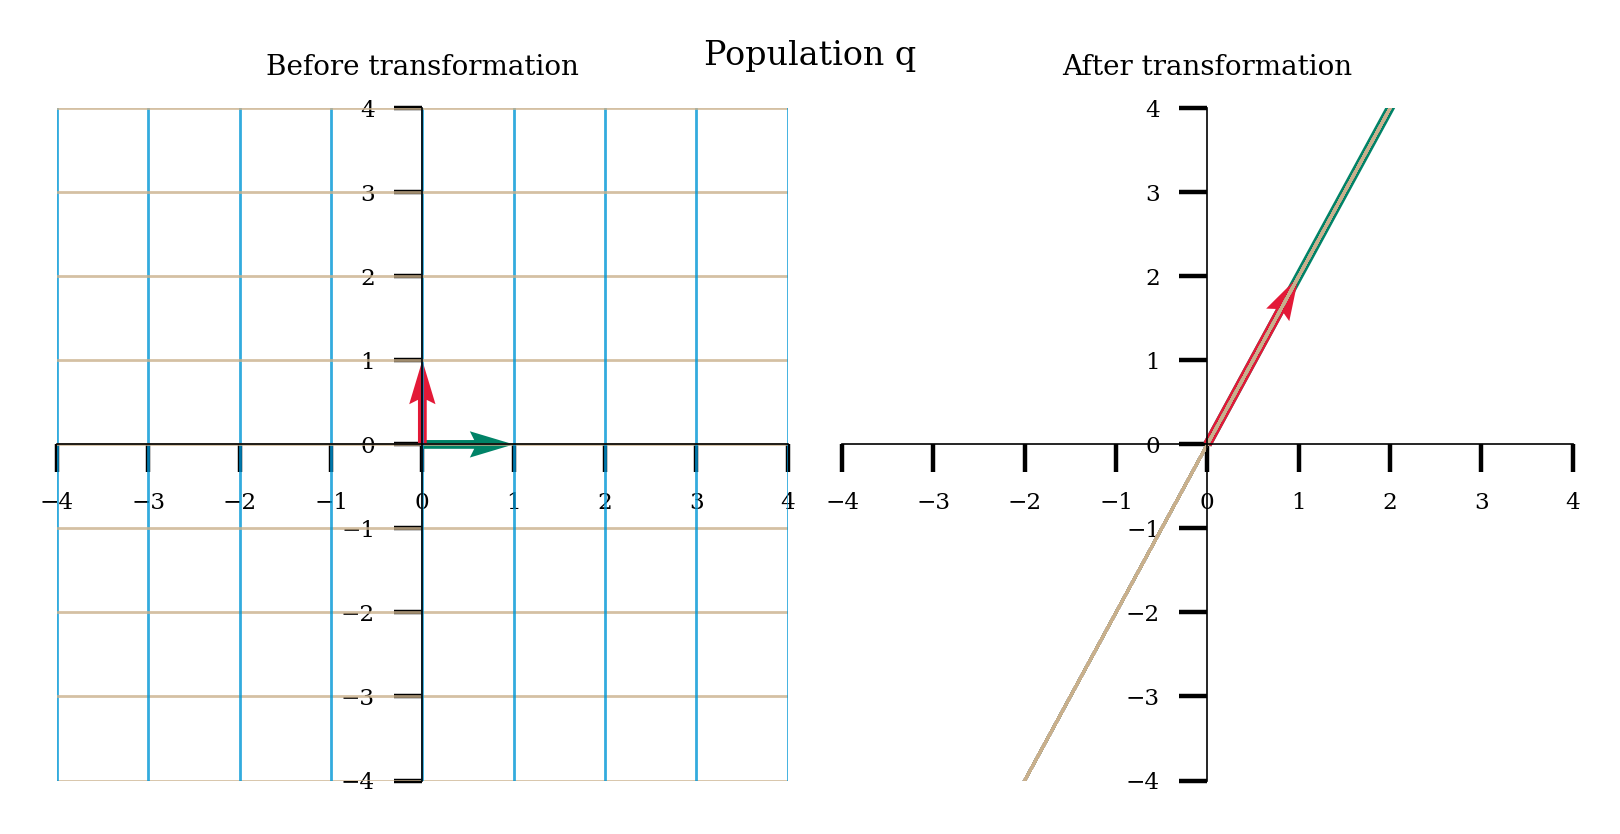

In [ ]:
# @markdown Execute to visualize linear transformations
P = np.array([[1, 3], [2, 1]])
plot_linear_transformation(P, name = 'p')

Q = np.array([[4, 1], [8, 2]])
plot_linear_transformation(Q, name = 'q')

In [ ]:
P = np.array([[1, 3], [2, 1]])
Q = np.array([[4, 1], [8, 2]])

1. rank(P) = 2 _The range of P is all of 2D space_; rank(Q) = 1 _The range of Q is that 1D line_
2. possible activity of retina neurons _resulting in 0 activity of LGN neuron_; dim(N(P)) = 0 and dim(N(Q)) = 1
3. p: 2 q: 1 same as rank _Intrinsic dimensionality of the responses of neurons is the number of basis of subspace
4. p: yes the transformation matrix is invertible but q is no with singular matrix which is not invertible


## Eigenstuff
- eigenvector and eigenvalue
- any vectors that does not change their direction after transformation are called eigenvectors.
- eigenvector is changed in their length only, which is the scalar eigenvalue.
- eigenvalue can be negative, meaning the eigenvector can be opposite direction

$$ W v = \lambda v$$

### important point
- helps figure out transformation
- understanding dynamic system

##

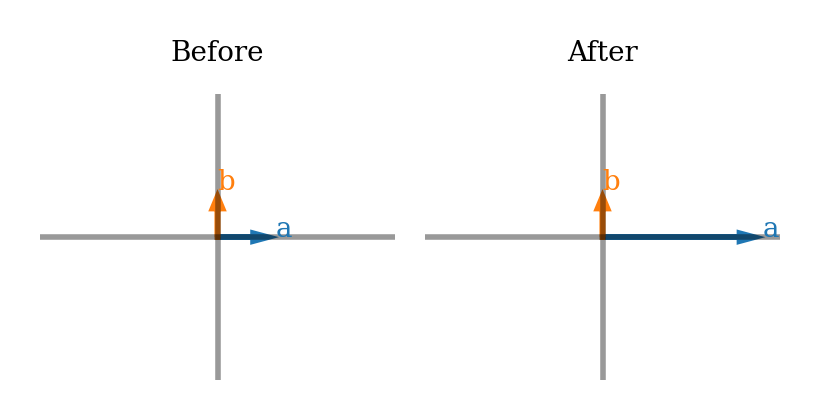

In [ ]:
W = np.array([[3, 0], [0, 1]])
plot_eig_vec_transform(W)

a, and b is eigenvector and the eigenvalue of a would be 3 and that of b be 1. 

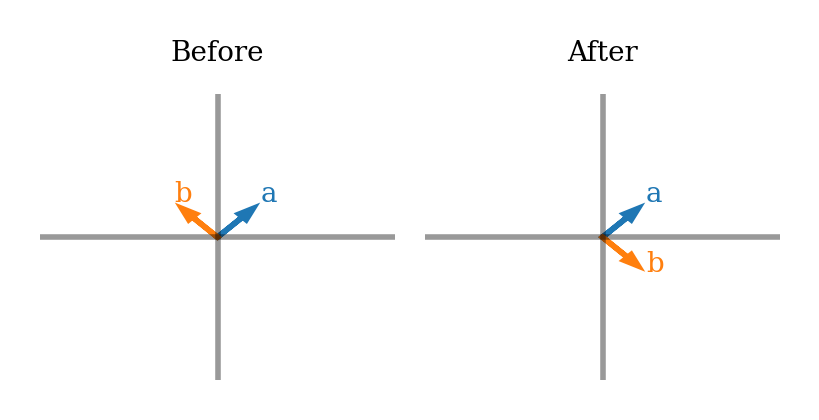

In [ ]:
W = np.array([[0, 1], [1, 0]])
plot_eig_vec_transform(W)

a is eigenvector and its eigenvalue is one.
b is also eigenvector and its eigenvalue is 3.

## Matrix multiplication

$$C_{row\ i,\ column \ j} = A_{row\ i}\cdot B_{column\ j}$$


In [ ]:
W = np.array([[3,2,1],
              [1,2,7]])
R = np.array([[0,1],
              [2,4],
              [5,1]])
G = W @ R

In [ ]:
print(G)

[[ 9 12]
 [39 16]]


# Bonus Tutorial:Discrete Dynamical Systems

## Setting

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

In [ ]:
# plotting function
def plot_circuit_responses(u, W, eigenstuff = False,
                           xlim='default',
                           ylim='default'):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Set up axis limits
    if xlim == 'default':
      extreme = np.maximum(np.abs(np.min(u)), np.max(u))
      xlim = [- extreme, extreme]
    if ylim == 'default':
      extreme = np.maximum(np.abs(np.min(u)), np.max(u))
      ylim = [- extreme, extreme]

    # Set up look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    cs = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Set up tracking textz
    tracker_text = ax.text(.5, .9, "", color='w',
                           fontsize=2,
                           verticalalignment='top',
                           horizontalalignment='left',
                           transform=ax.transAxes)

    # Plot eigenvectors
    if eigenstuff:
      eigvals, eigvecs = np.linalg.eig(W)

      if np.abs(eigvals[0]) < np.abs(eigvals[1]):
        lc1 = 'c'
        lc2 = 'g'
      else:
        lc1 = 'g'
        lc2 = 'c'

      ax.plot(np.arange(-10000, 10000)*eigvecs[0, 0],
              np.arange(-10000, 10000)*eigvecs[1, 0],
              lc1, alpha=.5, label = r'$\mathbf{v}_1$')
      ax.plot(np.arange(-10000, 10000)*eigvecs[0, 1],
              np.arange(-10000, 10000)*eigvecs[1, 1],
              lc2, alpha=.5, label = r'$\mathbf{v}_2$')
      ax.legend()

    # Set up scatter
    cmap = plt.cm.coolwarm
    norm = plt.Normalize(vmin=0, vmax=u.shape[1])
    ax.plot(u[0,:], u[1, :], alpha=.4, zorder = 0)
    scatter = ax.scatter(u[0, :], u[1, :], alpha=1,
                         c=cmap(norm(np.arange(u.shape[1]))),
                         zorder=1)


    ax.set(xlabel='Neuron 1 Firing Rate ($a_1$)',
           ylabel='Neuron 2 Firing Rate ($a_2$)',
           title='Neural firing over time')

    fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
                 ax=ax, label='Time step')

In [ ]:
# helper function

def get_eigval_specified_matrix(target_eig):
  """Generates matrix with specified eigvals

    Args:
      target_eig (list): list of target eigenvalues, can be real or complex,
              should be length 2 unless you desire repeated eigenvalues
              with the same eigenvector, in which case length 1

    Returns:
      ndarray: 2 x 2 matrix with target eigvals

  """

  # Set up two eigenvectors
  V = np.array([[1, 1], [-1, 1]]).astype('float')
  for i in range(2):
    V[:, i] = V[:, i]/np.linalg.norm(V[:, i])

  # Get matrix with target eigenvalues
  if type(target_eig[0]) == int or type(target_eig[0]) == float:

    if len(target_eig) == 2: # distinct eigvecs (not necessarily distinct eigvals)

        D = np.diag(target_eig)
        A = V @ D @ np.linalg.inv(V)

    else: # repeated with same vec
      summed = 2*target_eig[0]

      a = summed - 3
      d = 3
      bc = target_eig[0]**2 - a*d
      factors = [n for n in range(1, bc+ 1) if bc % n == 0]
      b = factors[int(np.floor(len(factors)/2))]
      c = bc/-b

      A = np.array([[a, b], [c, d]])

  elif type(target_eig[0]) == complex:

      C = [np.real(V[:,0]), np.real(V[:,1])]
      B = np.array([[np.real(target_eig[0]), np.imag(target_eig[0])],
                    [-np.imag(target_eig[0]), np.real(target_eig[0])]]).squeeze()
      A = C @ B @ np.linalg.inv(C)

  return A

## Section 1: definding a neural circuit
### Exercise 1: Implementing the circuit

$$a_0 = \begin{bmatrix}
1\\
1
\end{bmatrix}$$

$$W = \begin{bmatrix}
1 & 0.2\\
0.1 & 1\\
\end{bmatrix}$$

In [ ]:
def circuit_implementation(W, a0, T):
  '''
  Stimulat the responses of N neurons over time given their connections

  Args:
    W (ndarray): weight matrix of synaptic connections, should be N x N
    a0 (ndarray): initial condition or input vector, should be N,
    T (scalar): number of time steps to run stimulation for

  Returns:
    a (ndarray): the neural responses over time, should be N x T
  '''
  # Compute the number fo neurons
  N = W.shape[0]

  a = np.zeros((N,T))
  a[:, 0] = a0

  for i_t in range(1, T):
    a[:, i_t] = W @ a[:, i_t - 1]

  return a

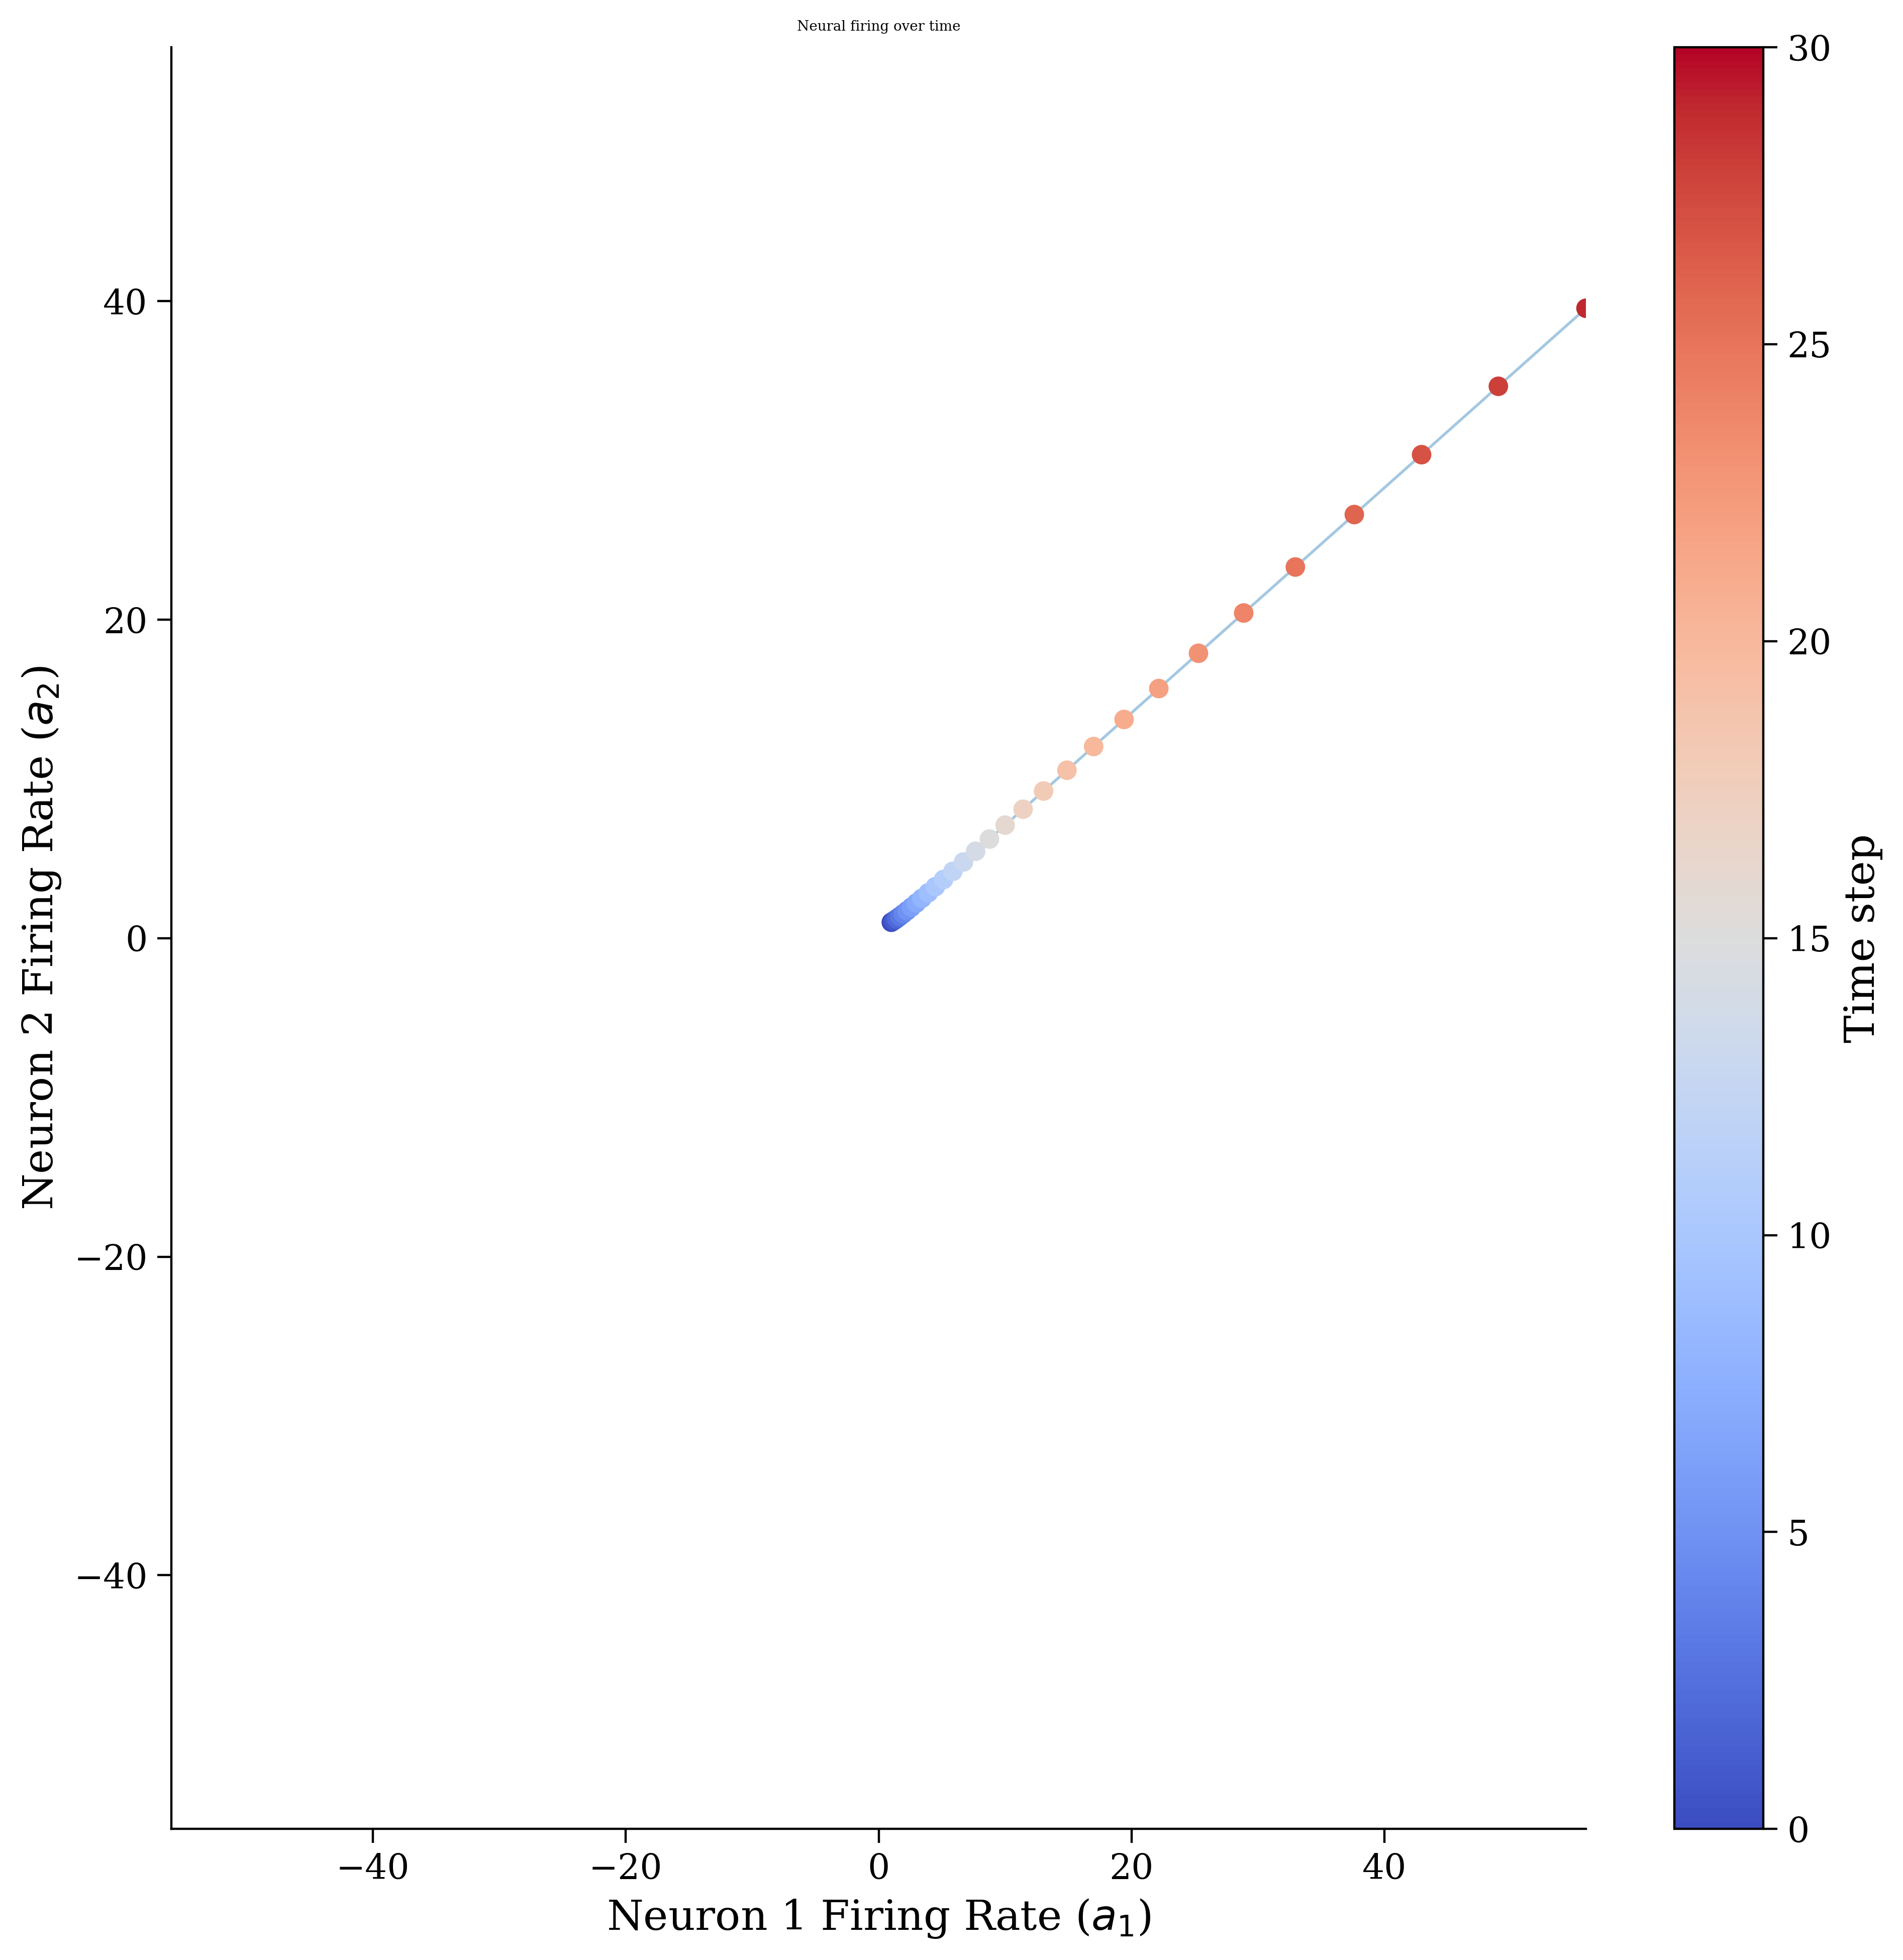

In [ ]:
W = np.array([[1, .2], [.1, 1]])
a0 = np.array([1, 1])
T = 30

a = circuit_implementation(W, a0, T)

plot_circuit_responses(a, W)

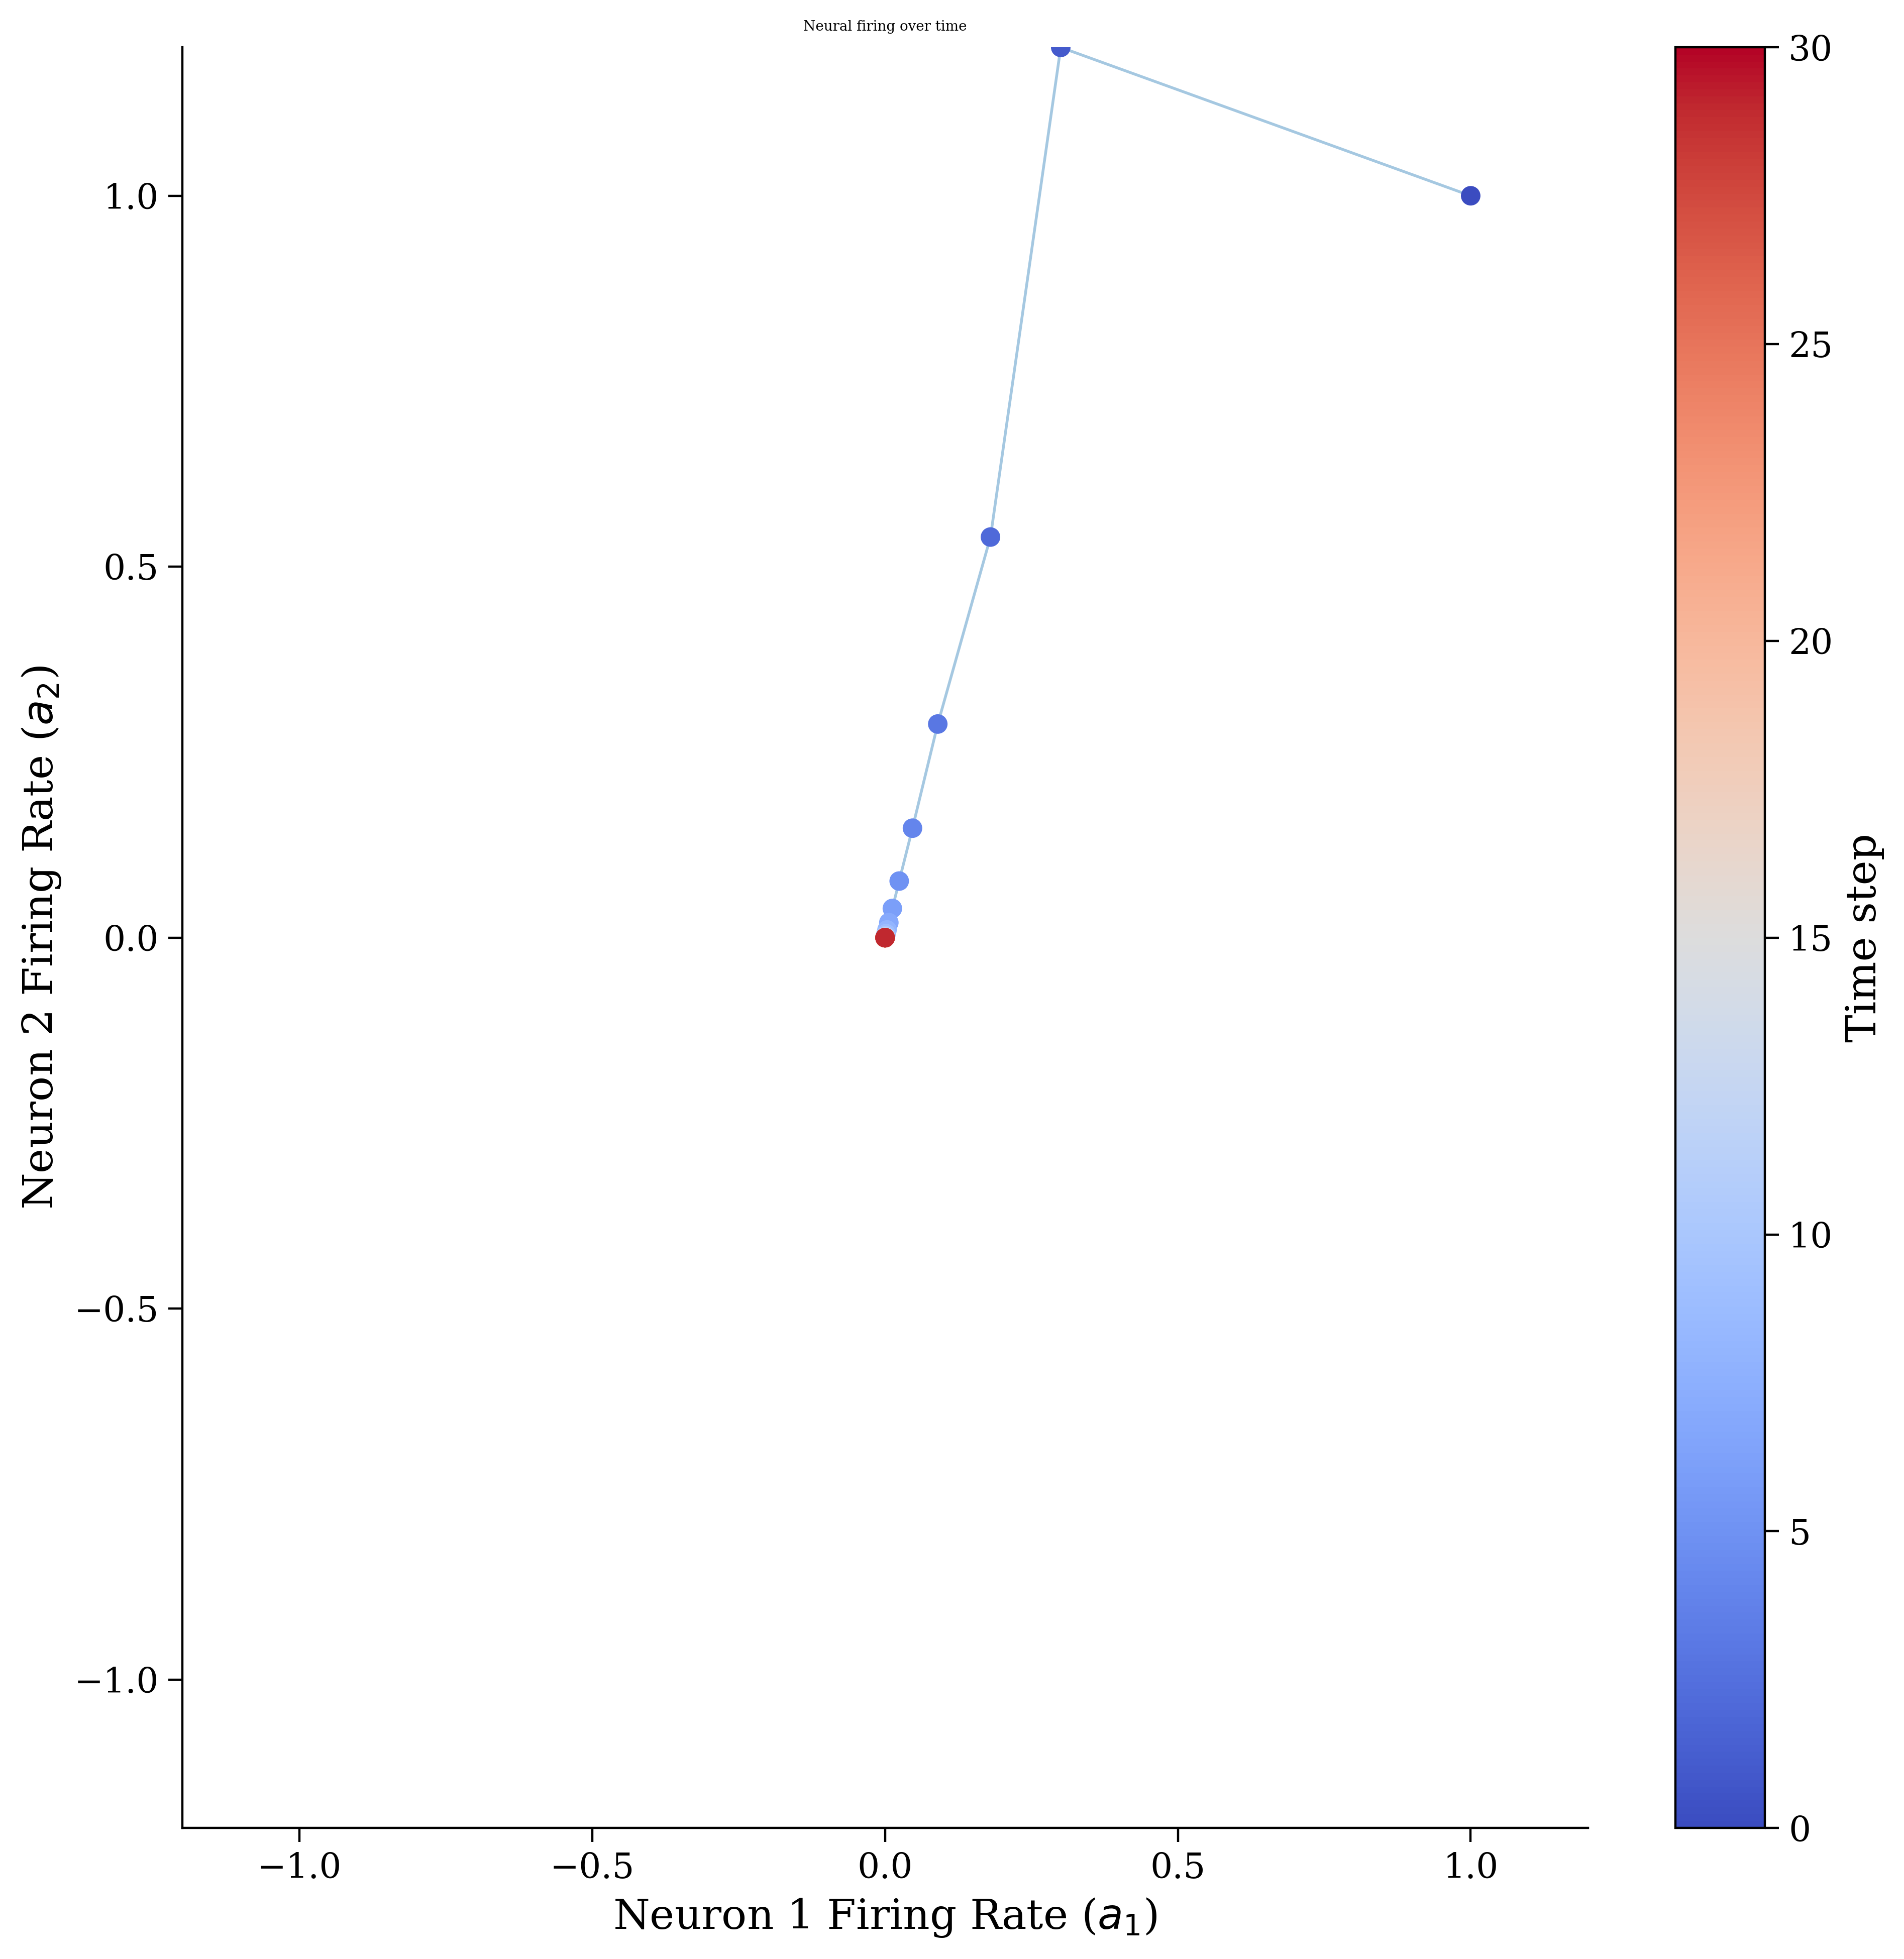

In [ ]:
# Define W, a0, T
W = np.array([[.2, .1], [1, .2]])
a0 = np.array([1, 1])
T = 30

# Get neural activities
a = circuit_implementation(W, a0, T)

# Visualize neural activities
plot_circuit_responses(a, W)

## Section2: Understanding dynamics using eigenstuff
### Section 2.1: Initial firing rates along an eigenvector

$$ a_t = W a_{t-1}$$
$$ a_t = W^t a_{0}$$

if initial firing rates were along an eigenvector
$$ a_0 = v$$ 
$$ a_1  = Wa_0 = Wv = \lambda v$$
$$ a_2 = Wa_1 = W\lambda v = \lambda Wv = \lambda^2 v$$
$$ a_t = \lambda^t v$$

$\lambda$에 따라서 움직이는 양상이 많이 바뀐다.


In [ ]:
@widgets.interact(eigenvalue = widgets.FloatSlider(value=0.5, min=-2, max=2, step=0.2))
def plot_system(eigenvalue):

  # Get weight matrix with specified eigenvalues
  W = get_eigval_specified_matrix([eigenvalue, eigenvalue])

  # Get initial condition
  u0 = np.array([1, 1])

  # Get neural activities
  u = circuit_implementation(W, u0, 10)

  # Visualize neural activities
  plot_circuit_responses(u, W, eigenstuff = True, xlim = [-15, 15], ylim = [-15, 15])

interactive(children=(FloatSlider(value=0.5, description='eigenvalue', max=2.0, min=-2.0, step=0.2), Output())…

1. the firing rates much more rapidly increase as time step increases -> explode
2. 1일때 안 움직이고 0일때 0,0dmfh rksek.
3. When eigenvalue is negative the firing rate 

- Eigenvalue >1 : infinite
- 0<= eigenvalue < 1: decay to 0
- -1<eigenvalue <0 : jump across origin but eventually decay to 0
- eigenvalue < -1 : jump across but explode

$$ a_t = \lambda^t v$$

$$ a_0 = c_1v_1 + c_2v_2$$
where $v_1$ and $v_2$ are eigenvectors of matrix $W$

\begin{equation}
\begin{split}
a_1 & = Wa_0 \\
 & = W(c_1v_1 + c_2v_2) \\
 & = c_1Wv_1 + c_2Wv_2 \\
 & = c_1\lambda_1 v_1 + c_2\lambda_2 v_2
\end{split}
\end{equation}


In [ ]:

eigenvalue1 = widgets.FloatSlider(value=0.5, min=0.2, max=2, step=0.2)
eigenvalue2 = widgets.FloatSlider(value=0.2, min=0.2, max=0.5, step=0.2)
a0_1 = widgets.FloatSlider(value=1, min=-5, max=5, step=0.2)
a0_2 = widgets.FloatSlider(value=2, min=-5, max=5, step=0.2)

def update_range(*args):
    eigenvalue2.max = eigenvalue1.value - 0.2
eigenvalue1.observe(update_range, 'value')


def plot_system(eigenvalue1, eigenvalue2, a0_1, a0_2):

  # Get initial condition
  a0 = np.array([a0_1, a0_2])

  # Get weight matrix with specified eigenvalues
  W = get_eigval_specified_matrix([eigenvalue1, eigenvalue2])

  # Get neural activities
  u = circuit_implementation(W, a0, 10)

  # Visualize neural activities
  plot_circuit_responses(u, W, eigenstuff = True, xlim = [-15, 15], ylim = [-15, 15])

widgets.interact(plot_system, eigenvalue1 = eigenvalue1, eigenvalue2 = eigenvalue2, a0_1 = a0_1, a0_2 = a0_2)

interactive(children=(FloatSlider(value=0.5, description='eigenvalue1', max=2.0, min=0.2, step=0.2), FloatSlid…

<function __main__.plot_system>

1. When both eigenvalue are greater than 1, firing rates explode
2. when both eigenvalue are less than 1, the firing rates decay to 0
3. The firing rate with eigenvalue less than 1 disappears and the other one with eigenvalue more than 1  
->The activities will eventually explode to positive or negative infinity, unless
    the initial condition lies exactly on the eigenvector with the small eigenvalue. If the
    initial condition is near to that eigenvector, the trajectory will first go towards
    the origin before exploding